In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from google.colab.patches import cv2_imshow
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import glob
from skimage.feature import local_binary_pattern

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


In [ ]:
#menguplod file melalui kode program

from google.colab import files

file = files.upload()

Saving dog.jpg to dog.jpg


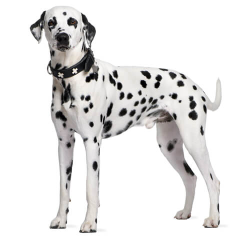

In [ ]:
img = cv2.imread("dog.jpg")

# Mengubah ukuran gambar
resized_img = cv2.resize(img, None, fx=0.5, fy=0.5)

# Menampilkan gambar yang telah diubah ukurannya
cv2_imshow(resized_img)

In [ ]:
def extractLBP(img):
    lbp = local_binary_pattern(img, 24, 8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 27), range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist, lbp

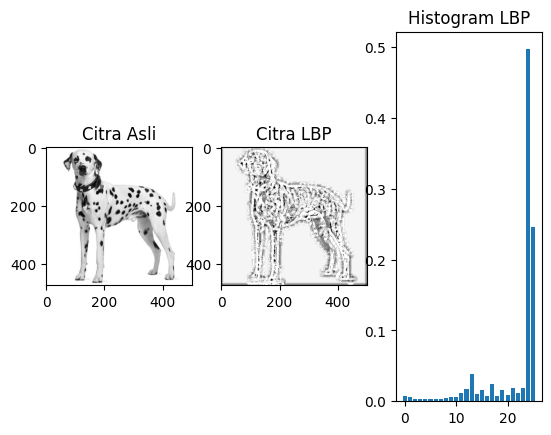

True

In [ ]:
img = cv2.imread("dog.jpg", cv2.IMREAD_GRAYSCALE)

# Memanggil fungsi extractLBP untuk mendapatkan histogram LBP dan gambar LBP dari citra
lbp_histogram, lbp_image = extractLBP(img)

# Menampilkan citra asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Menampilkan citra LBP
plt.subplot(1, 3, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('Citra LBP')

# Menampilkan histogram LBP
plt.subplot(1, 3, 3)
plt.bar(np.arange(0, 26), lbp_histogram, width=0.8)
plt.title('Histogram LBP')

# Menampilkan plot
plt.show()

# Menyimpan gambar hasil ekstraksi fitur LBP
cv2.imwrite("lbp_result.png", lbp_image)


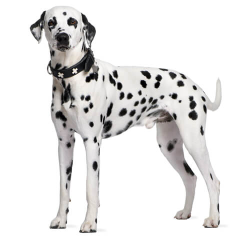

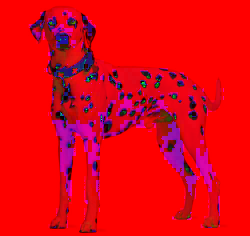

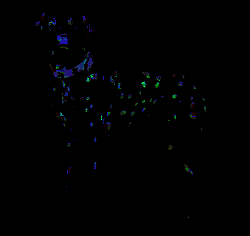

In [ ]:
img = resized_img
cv2_imshow(img)
hsv_image_spot = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image_spot)

mask = cv2.inRange(hsv_image_spot,(0,0,0),(180,255,40))
masked = cv2.bitwise_and(hsv_image_spot, hsv_image_spot, mask=mask)
cv2_imshow(masked)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
def preprocessing(arr):
  arr_prep=[]
  for i in range(np.shape(arr)[0]):
    img =cv2.cvtColor(arr[i],cv2.COLOR_BGR2GRAY)
    arr_prep.append(img)
  return arr_prep


In [ ]:
def featureExtraction(arr):
    arr_feature = []
    for i in range(np.shape(arr)[0]):
        arr_feature.append(extractLBP(arr[i]))
    return arr_feature

In [ ]:
import os
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Categories=['car','bus']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/SIB/Computer Vision/DAY 1/dataset'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : car
loaded category:car successfully
loading... category : bus
loaded category:bus successfully


In [ ]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(273, 67501)

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

In [ ]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)

print(f"The model is {accuracy*100}% accurate")

The model is 76.36363636363637% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['car', 'bus']))
def plot_confusion_matrix(conf_mat, figsize=(5,6), class_names = None, show_normed = True):
    if class_names is None:
        class_names = ['car','bus']

              precision    recall  f1-score   support

         car       0.78      0.69      0.73        26
         bus       0.75      0.83      0.79        29

    accuracy                           0.76        55
   macro avg       0.77      0.76      0.76        55
weighted avg       0.77      0.76      0.76        55



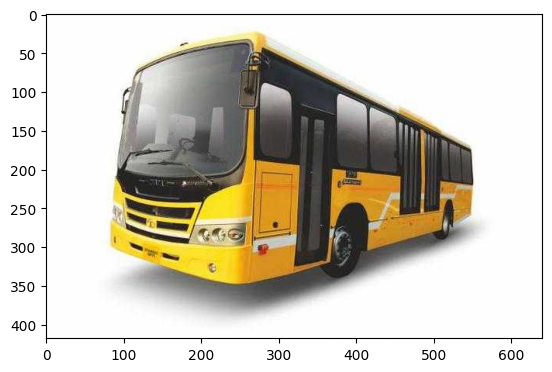

car = 3.020847589625384%
bus = 96.97915241037462%
The predicted image is : bus


In [ ]:
path='/content/drive/MyDrive/SIB/Computer Vision/DAY 1/dataset/bus/3ML59F6EIW8F.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
	print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

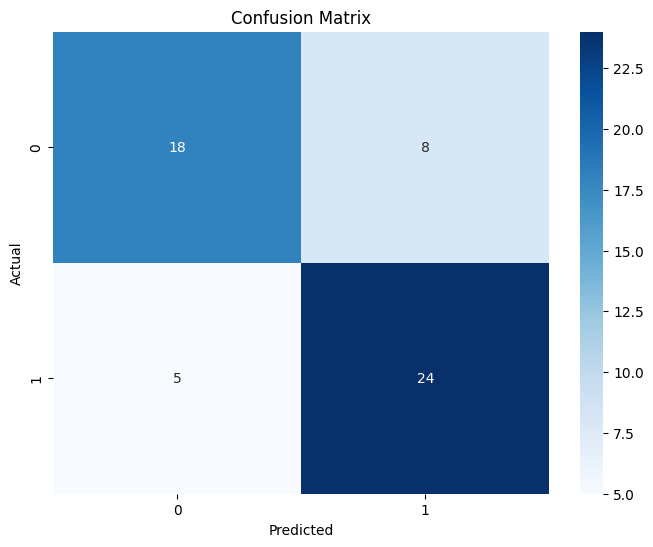

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()